In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [38]:
from PIL import Image

In [39]:
image1 = Image.open("/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C222ThinF_IMG_20151115_150728_cell_5.png")
image2 = Image.open("/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C62P23N_ThinF_IMG_20150818_132811_cell_191.png")
image3 = Image.open("/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C51AP12thinF_IMG_20150724_154243_cell_129.png")

### An Example cell image

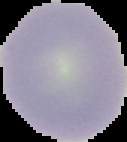

In [40]:
image1

In [41]:
image1.size, image2.size, image3.size          # We have different size. then we have to rescale.

((127, 142), (127, 118), (157, 145))

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
data = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.2)

In [44]:
trainData = data.flow_from_directory(directory = "/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images",target_size=(128,128), class_mode="binary", batch_size=16, subset="training")

Found 22048 images belonging to 2 classes.


In [45]:
validData = data.flow_from_directory(directory = "/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images",target_size=(128,128), class_mode="binary", batch_size=16, subset="validation")

Found 5510 images belonging to 2 classes.


### Creating CNN Model

In [46]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, MaxPooling2D, Dropout

In [68]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation ="relu", input_shape=(128,128,3)))
model.add(Conv2D(32, kernel_size = (3,3), activation ="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32, activation ="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation ="relu"))
model.add(Dense(128, activation ="relu"))
model.add(Dense(64, activation ="relu"))
model.add(Dense(32, activation ="relu"))
model.add(Dense(1, activation ="sigmoid"))

In [69]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])        # Adam Optimizer help us to find the largest and the smallest value by using gradient descend 

In [70]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 62, 62, 32)        128       
_________________________________________________________________
dropout_19 (Dropout)         (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_32 (Dense)             (None, 32)               

In [71]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])        # Adam Optimizer help us to find the largest and the smallest value by using gradient descend 

In [72]:
history = model.fit_generator(generator = trainData, steps_per_epoch= len(trainData), epochs = 20, verbose= 1, validation_data = validData, validation_steps = len(validData))

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1378/1378 [==============================] - 84s 60ms/step - loss: 0.6228 - accuracy: 0.6540 - val_loss: 0.7153 - val_accuracy: 0.5557
Epoch 2/20
1378/1378 [==============================] - 68s 49ms/step - loss: 0.3178 - accuracy: 0.8962 - val_loss: 0.2482 - val_accuracy: 0.9216
Epoch 3/20
1378/1378 [==============================] - 67s 49ms/step - loss: 0.2130 - accuracy: 0.9391 - val_loss: 0.1928 - val_accuracy: 0.9401
Epoch 4/20
1378/1378 [==============================] - 71s 52ms/step - loss: 0.1793 - accuracy: 0.9471 - val_loss: 0.2170 - val_accuracy: 0.9327
Epoch 5/20
1378/1378 [==============================] - 74s 54ms/step - loss: 0.1480 - accuracy: 0.9536 - val_loss: 0.2227 - val_accuracy: 0.9348
Epoch 6/20
1378/1378 [==============================] - 68s 49ms/step - loss: 0.1328 - accuracy: 0.9592 - val_loss: 0.2333 - val_accuracy: 0.9281
Epoch 7/20
1378/1378 [==============================] - 66s 48ms/step - loss: 0.1197 - accuracy: 0.9620 - val_loss: 0.2318 -

### Model Summary

In [73]:
summary = pd.DataFrame(model.history.history)

In [74]:
summary

,loss,accuracy,val_loss,val_accuracy
0,0.622787,0.654028,0.715272,0.555717
1,0.317776,0.896181,0.248162,0.921597
2,0.212966,0.939133,0.192760,0.940109
3,0.179294,0.947070,0.216965,0.932668
4,0.148033,0.953601,0.222694,0.934846
5,0.132824,0.959180,0.233293,0.928131
6,0.119732,0.961992,0.231817,0.931760
7,0.103786,0.968387,0.254834,0.929220
8,0.084516,0.975009,0.262580,0.925953
9,0.084117,0.975553,0.259451,0.929583


In [75]:
import matplotlib.pyplot as plt

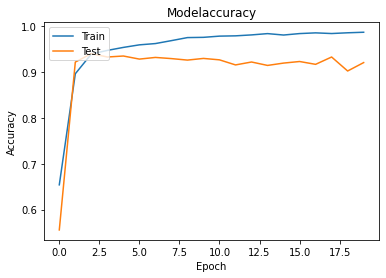

In [76]:
%matplotlib inline 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Modelaccuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

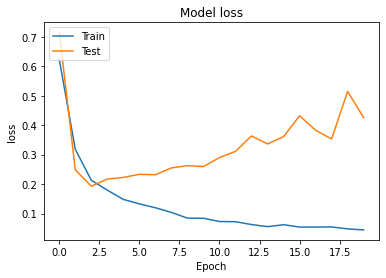

In [77]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

### Saving Model

In [ ]:
model.save("model.h5")